In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the CSV file
csv_path = 'gfp_intensity_results_batch1.csv'
df = pd.read_csv(csv_path)

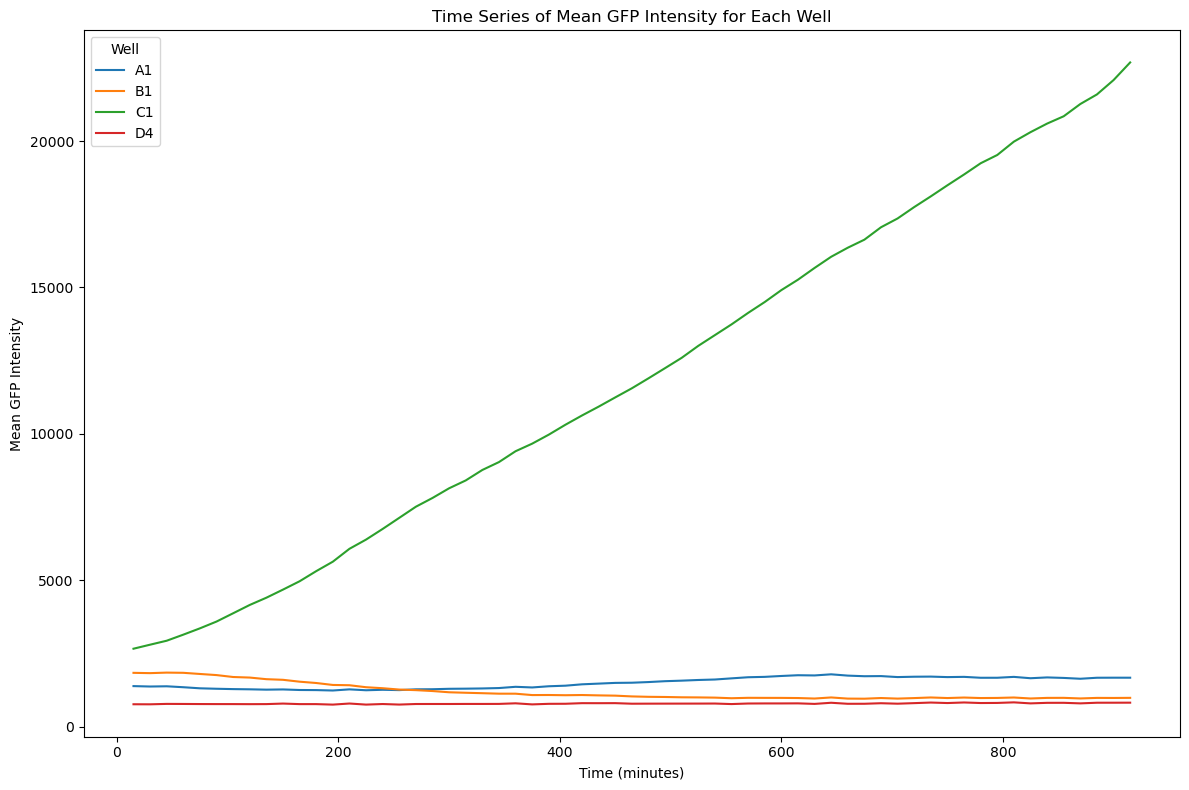

In [3]:
# Create a 'Time' column based on the order of images (15 minutes apart)
# Assuming that the Identifier uniquely identifies the well and image number is sequential
# Extract well info and image number if available
df['Well'] = df['Identifier'].str.extract(r'([A-D]\d+)')
df['Image_Number'] = df['Identifier'].str.extract(r'_(\d+)$').astype(int)

# Sort by well and image number to ensure proper time series order
df = df.sort_values(by=['Well', 'Image_Number'])

# Add the Time column: each image is taken 15 minutes apart
df['Time'] = df['Image_Number'] * 15  # Time in minutes

# Plot the time series for each well
wells = df['Well'].unique()
plt.figure(figsize=(12, 8))

for well in wells:
    well_data = df[df['Well'] == well]
    plt.plot(well_data['Time'], well_data['Mean_GFP_Intensity'], label=well)

# Customize the plot
plt.xlabel('Time (minutes)')
plt.ylabel('Mean GFP Intensity')
plt.title('Time Series of Mean GFP Intensity for Each Well')
plt.legend(title="Well")
plt.tight_layout()
plt.show()

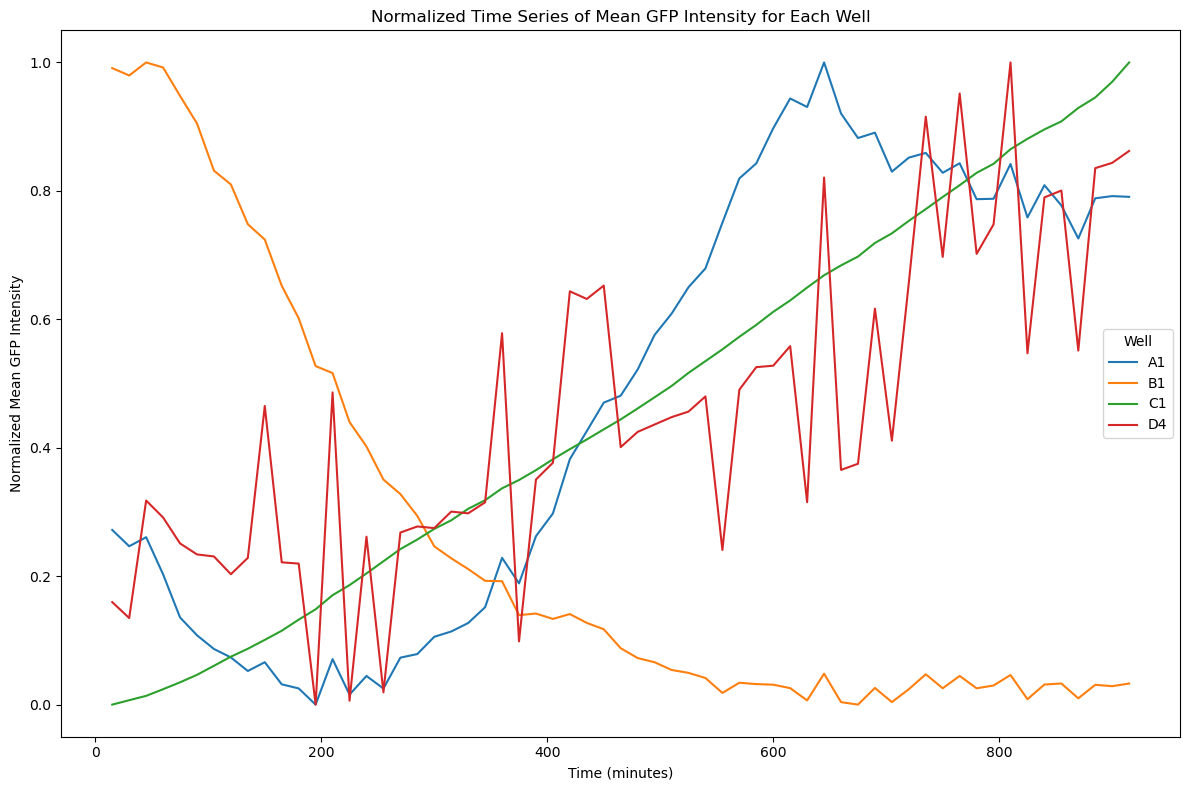

In [4]:
# Extract well information and image number for each Identifier
df['Well'] = df['Identifier'].str.extract(r'([A-D]\d+)')
df['Image_Number'] = df['Identifier'].str.extract(r'_(\d+)$').astype(int)

# Sort by well and image number to ensure proper time series order
df = df.sort_values(by=['Well', 'Image_Number'])

# Add the Time column (15 minutes apart)
df['Time'] = df['Image_Number'] * 15  # Time in minutes

# Min-max normalization by well
df['Normalized_Mean_GFP_Intensity'] = df.groupby('Well')['Mean_GFP_Intensity'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot the normalized time series for each well
wells = df['Well'].unique()
plt.figure(figsize=(12, 8))

for well in wells:
    well_data = df[df['Well'] == well]
    plt.plot(well_data['Time'], well_data['Normalized_Mean_GFP_Intensity'], label=well)

# Customize the plot
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized Mean GFP Intensity')
plt.title('Normalized Time Series of Mean GFP Intensity for Each Well')
plt.legend(title="Well")
plt.tight_layout()
plt.show()